# Credit Card Fraud Detection

This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.



## Importing Libraries


In [1]:
!pip install scikit-plot

In [2]:
!pip install scipy==1.7.3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 17.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 79.0 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
xgboost 2.1.1 requires nvidia-nccl-cu12; platform_system == "Linux" and platform_machine != "aarch64", which is not installed.
albucore 0.0.13 requires numpy<2,>=1.24.4, but you have numpy 1.22.4 which is incompatible.
albumentations 1.4.13 requires numpy>=1.24.4, but you have numpy 1.22.4 which is incompatible.
albumentations 1.4.13 requires scipy>=1.10.0, but y

In [2]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
import scikitplot as skplt
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.cluster import KMeans
import cv2



## Load Dataset

In [3]:
# Dataset Link: https://www.kaggle.com/datasets/mojtabanafez/rayan-homework1/data
!kaggle datasets download -d mojtabanafez/rayan-homework1

Dataset URL: https://www.kaggle.com/datasets/mojtabanafez/rayan-homework1
License(s): apache-2.0
100% 66.0M/66.0M [00:03<00:00, 32.6MB/s]
100% 66.0M/66.0M [00:03<00:00, 22.9MB/s]


In [4]:
!unzip ./rayan-homework1.zip

Archive:  ./rayan-homework1.zip
  inflating: creditcard.csv          


In [5]:
df = pd.read_csv('./creditcard.csv')
df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
# Separate features and target variable
X = df.drop('Class', axis=1)
y = df['Class']
X.shape, y.shape

((284807, 30), (284807,))

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [8]:
import warnings
warnings.filterwarnings('ignore')

## Exploratory Data Analysis (EDA)



**Student Task:**
1. Check Summary Statistics for the Dataset
2. Visualize Distribution of Classes
3. Check Correlation Matrix
4. Plot the Distribution of Some Selected Features
5. Additional Analysis (Choose at Least 5)
    * Example: Data Visualization (After Dimension Reduction), Outlier Detection, Feature Engineering, Insightful Plots, ...

In [9]:
# Display summary statistics for the dataset
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


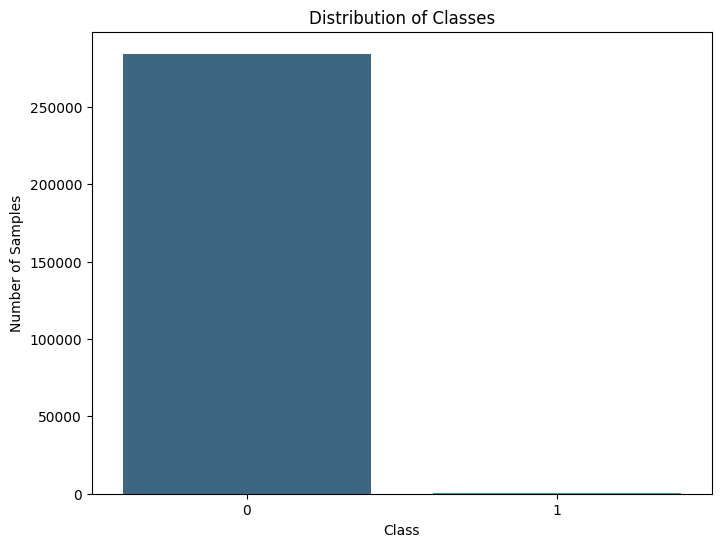

In [13]:
# Visualize the class distribution
y_pd = pd.Series(y)
plt.figure(figsize=(8, 6))
sns.countplot(x=y_pd, palette="viridis")
plt.title('Distribution of Classes')
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.show()

In [14]:
# Display the class distribution in percentages
print('Class Distribution:')
class_distribution = y_train.value_counts(normalize=True) * 100
print(class_distribution)

Class Distribution:
Class
0    99.821432
1     0.178568
Name: proportion, dtype: float64


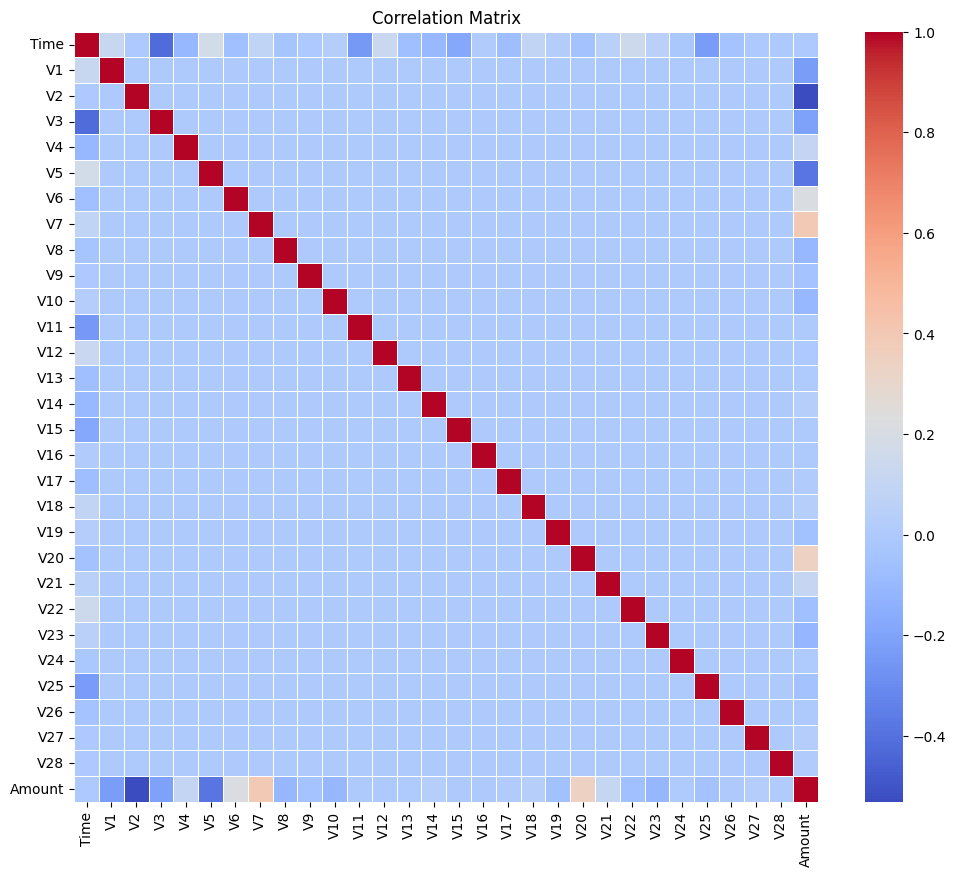

In [16]:
# Compute the correlation matrix
correlation_matrix = X.corr()
plt.figure(figsize=(12, 10))
# Create the heatmap
sns.heatmap(correlation_matrix, annot=False, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

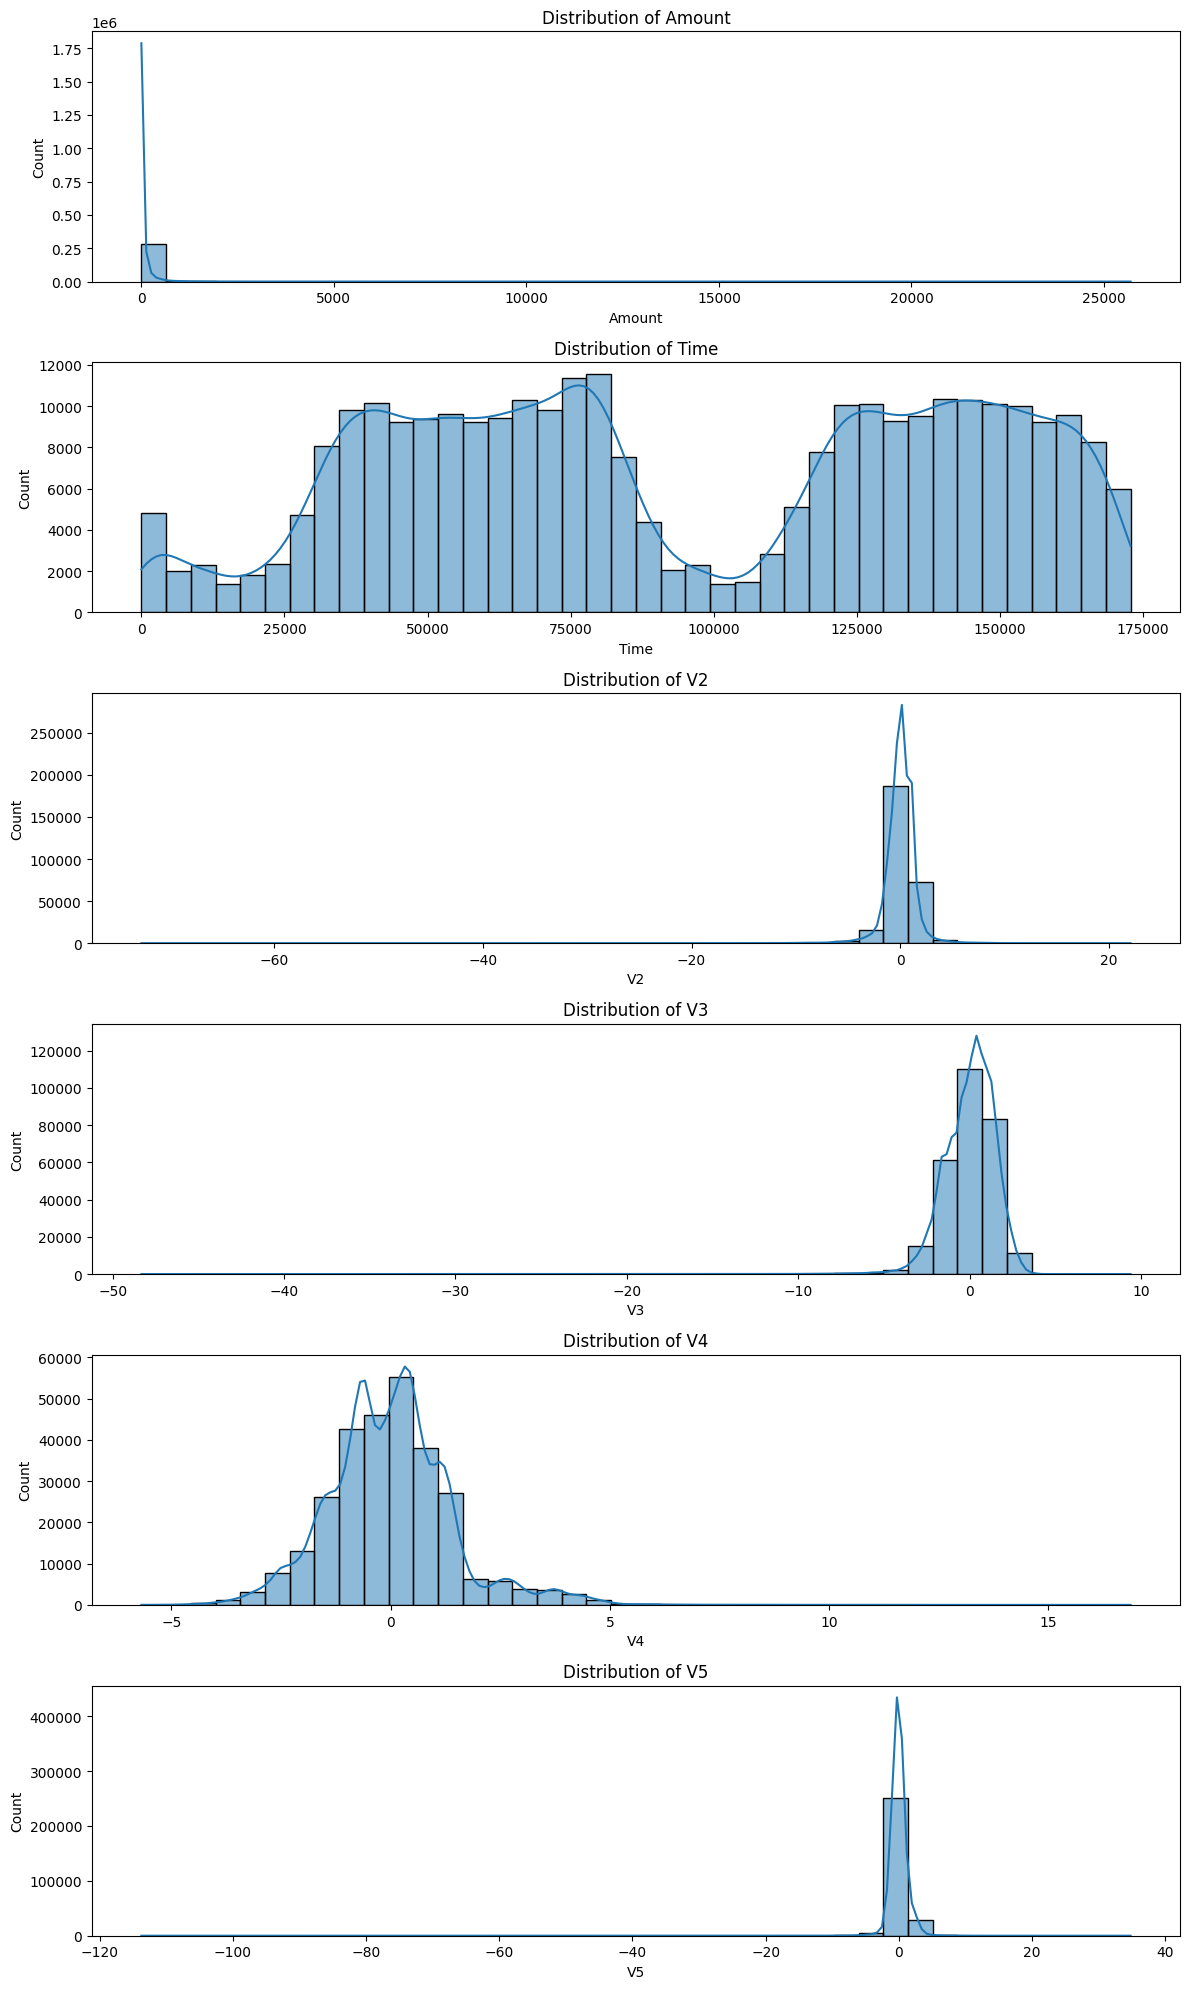

In [17]:
# Plot the distribution of a few selected features
selected_features = ['Amount', 'Time', 'V2', 'V3', 'V4', 'V5']
plt.figure(figsize=(12, 20))
for i, feature in enumerate(selected_features):
    plt.subplot(len(selected_features), 1, i + 1)
    sns.histplot(X[feature], kde=True, bins=40)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
plt.tight_layout()
plt.show()


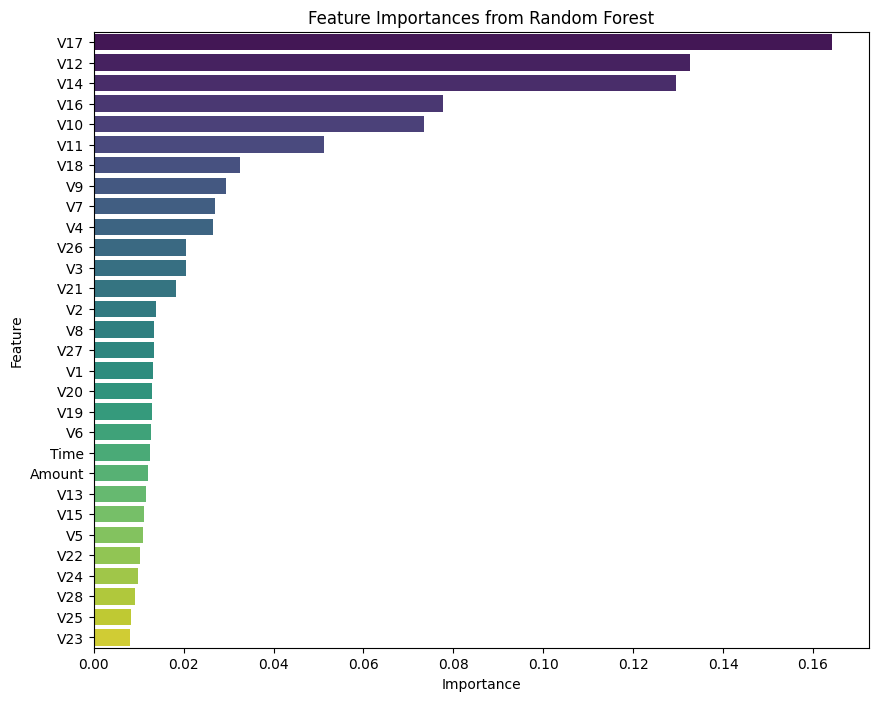

In [19]:
# Plot feature importances
from sklearn.ensemble import RandomForestClassifier
x_df = pd.DataFrame(X)
# Train a Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(x_df, y)

# Get feature importances
feature_importances = model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': x_df.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importances from Random Forest')
plt.show()

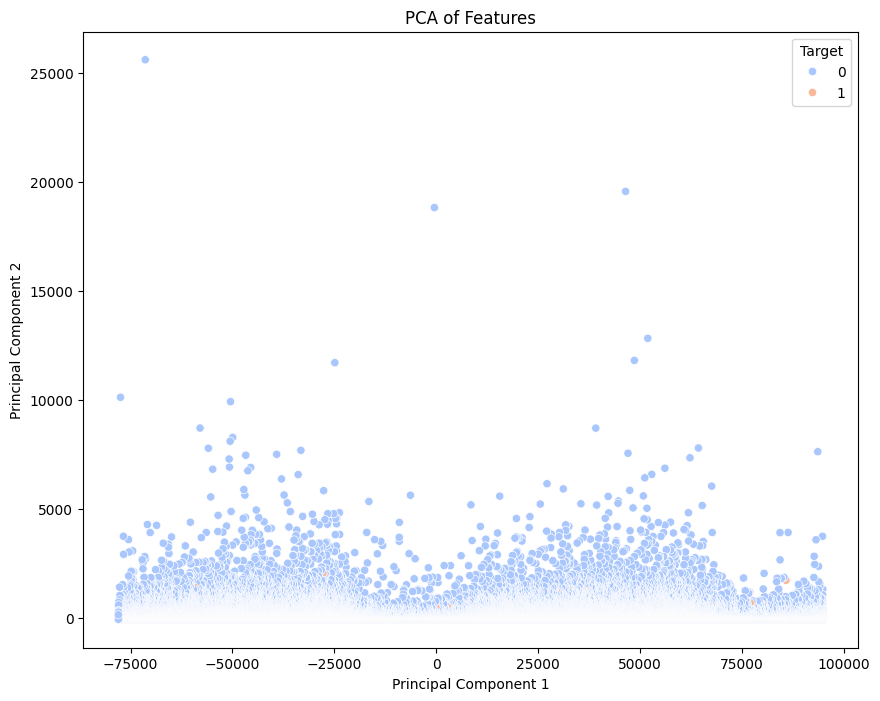

In [23]:
# PCA
from sklearn.decomposition import PCA
# Apply PCA
pca = PCA(n_components=2)
x_pca = pca.fit_transform(X)

# Convert to DataFrame for easy plotting
pca_df = pd.DataFrame(data=x_pca, columns=['Principal Component 1', 'Principal Component 2'])
pca_df['Target'] = y

# Plot the PCA results
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Principal Component 1', y='Principal Component 2', hue='Target', data=pca_df, palette='coolwarm')
plt.title('PCA of Features')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

## Data Preprocessing

In [25]:
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [26]:
smote = SMOTE(random_state=42)  # Balancing partially
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [27]:
from sklearn.pipeline import make_pipeline
lr_model = LogisticRegression(random_state=42)
lr_model = make_pipeline(RobustScaler(), lr_model)

## Training

### Logistic Regression

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.80      0.83      0.82       136

    accuracy                           1.00     85443
   macro avg       0.90      0.92      0.91     85443
weighted avg       1.00      1.00      1.00     85443

Confusion Matrix:
Logistic Regression Confusion Matrix:


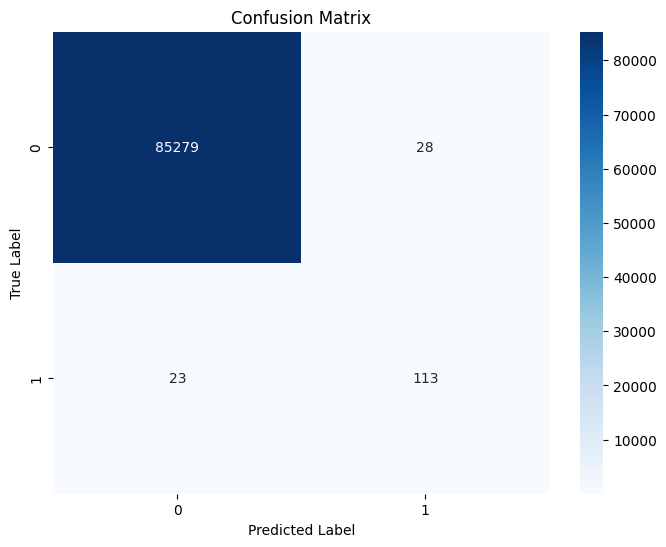

In [68]:
# Train model
lr_model.fit(X_resampled, y_resampled)

# Predict on Test Set with adjusted threshold
y_pred_proba = lr_model.predict_proba(X_test)[:, 1]
threshold = 0.9999968
y_pred = (y_pred_proba >= threshold).astype(int)

# Evaluation
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")

# Plot Confusion Matrix using Seaborn
print("Logistic Regression Confusion Matrix:")
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

### SVM

SVM Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.73      0.82      0.77       136

    accuracy                           1.00     85443
   macro avg       0.86      0.91      0.88     85443
weighted avg       1.00      1.00      1.00     85443

SVM Confusion Matrix


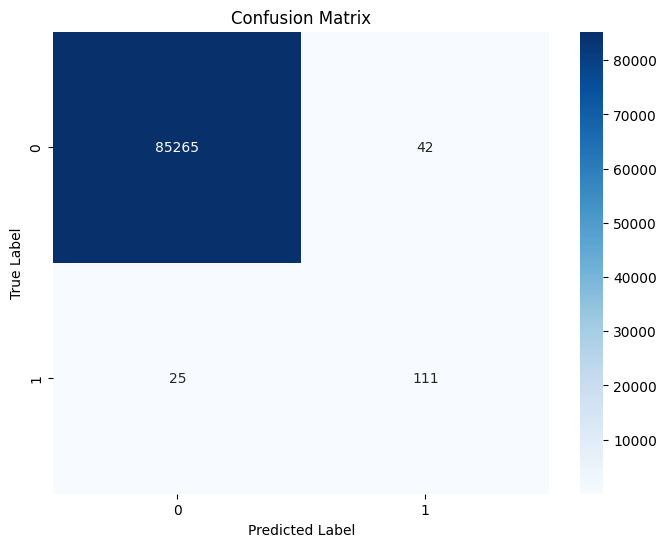

In [30]:
from sklearn.svm import LinearSVC

# Create the LinearSVC model
svm_model = LinearSVC(class_weight='balanced', random_state=42)
svm_model = make_pipeline(RobustScaler(), svm_model)

# Train model
svm_model.fit(X_resampled, y_resampled)

# Calculate the decision function on the test data
decision_function = svm_model.decision_function(X_test)

# Determine the threshold for classifying
threshold = np.percentile(decision_function, 99.821)

# Make predictions based on the threshold
y_pred = (decision_function >= threshold).astype(int)

# Print classification report
print('SVM Classification Report:')
print(classification_report(y_test, y_pred))
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix using Seaborn
print('SVM Confusion Matrix')
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Unsupervised Image Segmentation using Clustering!

## Load Data

In [36]:
import warnings
warnings.filterwarnings("ignore")

In [37]:
# Image Link (You can download and upload it): https://drive.google.com/file/d/16iMaYEGH-GgmqZfrCTw2vjYayllcgFcb/view?usp=sharing
!gdown 16iMaYEGH-GgmqZfrCTw2vjYayllcgFcb

Downloading...
From: https://drive.google.com/uc?id=16iMaYEGH-GgmqZfrCTw2vjYayllcgFcb
To: /content/elephant.jpg
100% 36.2k/36.2k [00:00<00:00, 48.6MB/s]


In [38]:
im =  cv2.imread('./elephant.jpg') # Reads an image into BGR Format
im = cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
original_shape = im.shape
print(im.shape)

(330, 500, 3)


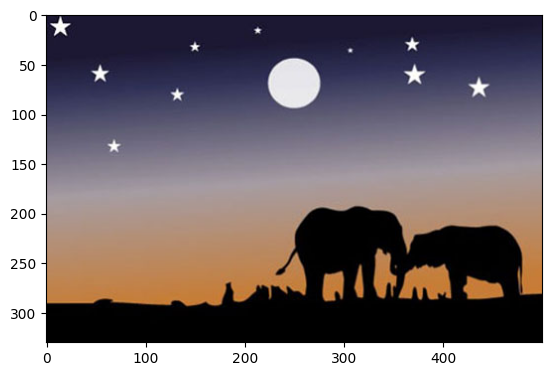

In [39]:
plt.imshow(im) # as RGB Format
plt.show()

In [40]:
# Flatten Each channel of the Image
all_pixels  = im.reshape((-1,3))
print(all_pixels.shape)

(165000, 3)


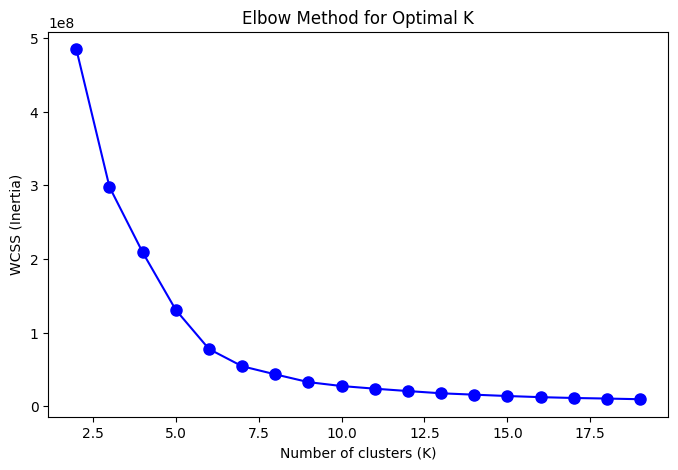

In [46]:
from sklearn.metrics import silhouette_score

# Range of K values to try
k_values = range(2, 20)
wcss = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(all_pixels)
    wcss.append(kmeans.inertia_)

# Plot the Elbow curve
plt.figure(figsize=(8, 5))
plt.plot(k_values, wcss, 'bo-', markersize=8)
plt.xlabel('Number of clusters (K)')
plt.ylabel('WCSS (Inertia)')
plt.title('Elbow Method for Optimal K')
plt.show()

## Number of Dominant Colors in Image

## Visualize Dominant Color

In [77]:
K = 6
kmeans = KMeans(n_clusters=K, random_state=42)
kmeans.fit(all_pixels)
dominant_colors = kmeans.cluster_centers_.astype(int)

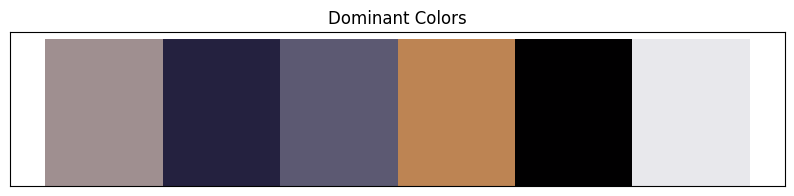

In [78]:
# Plot the each of dominant color as image
plt.figure(figsize=(10, 2))
plt.title('Dominant Colors')
plt.bar(range(K), [1]*K, color=[dominant_colors[i]/255 for i in range(K)], width=1)
plt.xticks([])
plt.yticks([])
plt.show()

## Segmenting original image

In [79]:
new_img = np.zeros((330*500,3),dtype='uint8')
print(new_img.shape)

(165000, 3)


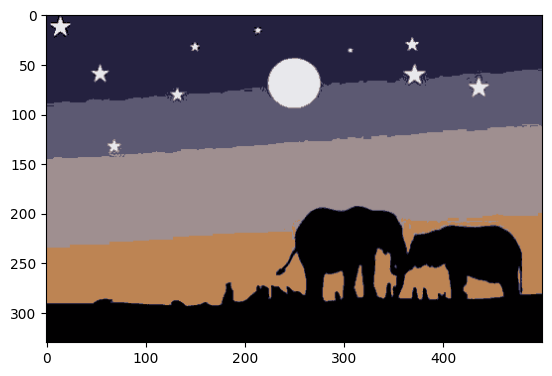

In [80]:
colors = kmeans.cluster_centers_
lables = kmeans.labels_

# Iterate over the image
for ix in range(new_img.shape[0]):
    new_img[ix] = colors[lables[ix]]

new_img = new_img.reshape((original_shape))
plt.imshow(new_img)
plt.show()